
## <font color='blue'>Inteligência Artificial Para Segurança Cibernética</font>
## <font color='blue'>Projeto 2</font>
## <font color='blue'>Detectando e Prevendo Diferentes Tipos de Invasão de Rede</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports
import pickle
import sklearn
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Carregando e Organizando os Dados

In [4]:
# Dados de treino
df_treino = pd.read_csv('dados/dataset_treino.txt', sep = ',', header = None)

In [5]:
# Dados de teste
df_teste = pd.read_csv('dados/dataset_teste.txt', sep = ',', header = None)

In [6]:
# Shape
df_treino.shape

(125000, 43)

In [7]:
# Shape
df_teste.shape

(22500, 43)

In [8]:
# Visualiza as primeiras linhas
df_treino.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [9]:
# Visualiza as primeiras linhas
df_treino.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
66835,0,udp,domain_u,SF,42,42,0,0,0,0,...,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,18
54276,0,tcp,http,S0,0,0,0,0,0,0,...,0.80,0.20,0.10,0.0,0.8,1.0,0.0,0.0,neptune,16
42118,510,udp,other,SF,145,105,0,0,0,0,...,0.00,0.54,0.91,0.0,0.0,0.0,0.0,0.0,normal,21
34671,0,tcp,bgp,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.0,1.0,1.0,0.0,0.0,neptune,20
79999,0,tcp,csnet_ns,S0,0,0,0,0,0,0,...,0.07,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune,20


In [10]:
# Títulos para as colunas
nomes_colunas = ["duration",
                 "protocol_type",
                 "service",
                 "flag",
                 "src_bytes",
                 "dst_bytes",
                 "land",
                 "wrong_fragment",
                 "urgent",
                 "hot",
                 "num_failed_logins",
                 "logged_in",
                 "num_compromised",
                 "root_shell",
                 "su_attempted",
                 "num_root",
                 "num_file_creations", 
                 "num_shells",
                 "num_access_files",
                 "num_outbound_cmds",
                 "is_host_login",
                 "is_guest_login",
                 "count",
                 "srv_count",
                 "serror_rate",
                 "srv_serror_rate",
                 "rerror_rate",
                 "srv_rerror_rate",
                 "same_srv_rate",
                 "diff_srv_rate",
                 "srv_diff_host_rate",
                 "dst_host_count",
                 "dst_host_srv_count",
                 "dst_host_same_srv_rate",
                 "dst_host_diff_srv_rate",
                 "dst_host_same_src_port_rate",
                 "dst_host_srv_diff_host_rate",
                 "dst_host_serror_rate",
                 "dst_host_srv_serror_rate",
                 "dst_host_rerror_rate",
                 "dst_host_srv_rerror_rate",
                 "attack",
                 "last_flag"] 

In [11]:
len(nomes_colunas)

43

In [12]:
# Inclui os nomes das colunas nos dataframes
df_treino.columns = nomes_colunas
df_teste.columns = nomes_colunas

In [13]:
df_treino.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
31881,0,tcp,whois,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.0,1.00,1.0,neptune,20
39625,0,udp,private,SF,1,0,0,0,0,0,...,0.01,0.47,0.61,0.00,0.03,0.0,0.36,0.0,satan,20
71222,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1.00,0.00,1.00,0.50,0.00,0.0,0.00,0.0,ipsweep,16
95958,0,udp,domain_u,SF,46,128,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.0,normal,18
40768,0,tcp,http,SF,308,5442,0,0,0,0,...,1.00,0.00,0.14,0.05,0.00,0.0,0.00,0.0,normal,21


In [14]:
df_teste.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [15]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125000 non-null  int64  
 1   protocol_type                125000 non-null  object 
 2   service                      125000 non-null  object 
 3   flag                         125000 non-null  object 
 4   src_bytes                    125000 non-null  int64  
 5   dst_bytes                    125000 non-null  int64  
 6   land                         125000 non-null  int64  
 7   wrong_fragment               125000 non-null  int64  
 8   urgent                       125000 non-null  int64  
 9   hot                          125000 non-null  int64  
 10  num_failed_logins            125000 non-null  int64  
 11  logged_in                    125000 non-null  int64  
 12  num_compromised              125000 non-null  int64  
 13 

In [16]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22500 non-null  int64  
 1   protocol_type                22500 non-null  object 
 2   service                      22500 non-null  object 
 3   flag                         22500 non-null  object 
 4   src_bytes                    22500 non-null  int64  
 5   dst_bytes                    22500 non-null  int64  
 6   land                         22500 non-null  int64  
 7   wrong_fragment               22500 non-null  int64  
 8   urgent                       22500 non-null  int64  
 9   hot                          22500 non-null  int64  
 10  num_failed_logins            22500 non-null  int64  
 11  logged_in                    22500 non-null  int64  
 12  num_compromised              22500 non-null  int64  
 13  root_shell      

## Dicionário de Dados

In [17]:
# Cria o dicionário
dicionario_dados = {
    "duration": "Duração da conexão (segundos)",
    "protocol_type": "Tipo de protocolo (e.g., tcp, udp, icmp)",
    "service": "Serviço da rede utilizado (e.g., http, ftp, smtp)",
    "flag": "Status da conexão (e.g., SF, S0, REJ)",
    "src_bytes": "Bytes enviados da fonte para o destino",
    "dst_bytes": "Bytes enviados do destino para a fonte",
    "land": "Conexão com mesmo host/port source e destination (0 ou 1)",
    "wrong_fragment": "Número de fragmentos errados",
    "urgent": "Número de pacotes urgentes",
    "hot": "Número de indicadores 'hot' (ex: login, file operations, etc.)",
    "num_failed_logins": "Número de tentativas de login falhadas",
    "logged_in": "Login efetuado (0 ou 1)",
    "num_compromised": "Número de condições comprometedoras",
    "root_shell": "Obtido shell root (0 ou 1)",
    "su_attempted": "Tentativas de usar o comando 'su' (0 ou 1)",
    "num_root": "Número de acessos a conta root",
    "num_file_creations": "Número de criações de arquivo",
    "num_shells": "Número de shells abertos",
    "num_access_files": "Número de operações de acesso a arquivos",
    "num_outbound_cmds": "Número de comandos outbound no modo ftp",
    "is_host_login": "Login de host (0 ou 1)",
    "is_guest_login": "Login de convidado (0 ou 1)",
    "count": "Número de conexões à mesma host como a conexão atual nos últimos 2 segundos",
    "srv_count": "Número de conexões ao mesmo serviço como a conexão atual nos últimos 2 segundos",
    "serror_rate": "Taxa de conexões com erros no início",
    "srv_serror_rate": "Taxa de conexões ao serviço com erros no início",
    "rerror_rate": "Taxa de conexões com erros na resposta",
    "srv_rerror_rate": "Taxa de conexões ao serviço com erros na resposta",
    "same_srv_rate": "Taxa de conexões ao mesmo serviço",
    "diff_srv_rate": "Taxa de conexões a serviços diferentes",
    "srv_diff_host_rate": "Taxa de conexões ao mesmo serviço por hosts diferentes",
    "dst_host_count": "Número de conexões a mesmo destino como a conexão atual nos últimos 2 segundos",
    "dst_host_srv_count": "Número de conexões ao mesmo serviço a mesmo destino como a conexão atual nos últimos 2 segundos",
    "dst_host_same_srv_rate": "Taxa de conexões ao mesmo serviço a destino de host",
    "dst_host_diff_srv_rate": "Taxa de conexões a serviços diferentes a destino de host",
    "dst_host_same_src_port_rate": "Taxa de conexões ao mesmo serviço a porta de origem",
    "dst_host_srv_diff_host_rate": "Taxa de conexões ao mesmo serviço a diferentes hosts",
    "dst_host_serror_rate": "Taxa de conexões com erros no início a destino de host",
    "dst_host_srv_serror_rate": "Taxa de conexões ao serviço com erros no início a destino de host",
    "dst_host_rerror_rate": "Taxa de conexões com erros na resposta a destino de host",
    "dst_host_srv_rerror_rate": "Taxa de conexões ao serviço com erros na resposta a destino de host",
    "attack": "Tipo de ataque ou 'normal' para tráfego normal",
    "last_flag": "Último valor da flag de conexão"
}

## Engenharia de Atributos - Recategorização dos Dados

Vamos verificar os tipos de ataques que estão registrados no dataset.

In [18]:
# Usando o dicionário
dicionario_dados["attack"]

"Tipo de ataque ou 'normal' para tráfego normal"

In [19]:
# Registros por classe
df_treino['attack'].value_counts()

attack
normal             66809
neptune            40895
satan               3614
ipsweep             3576
portsweep           2910
smurf               2626
nmap                1479
back                 945
warezclient          887
teardrop             885
pod                  201
guess_passwd          51
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [20]:
# Registros por classe
df_teste['attack'].value_counts()

attack
normal             9694
neptune            4650
guess_passwd       1229
mscan               994
warezmaster         944
apache2             734
satan               732
processtable        683
smurf               662
back                357
snmpguess           331
saint               318
mailbomb            292
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
teardrop             12
rootkit              12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

> Modelos de Machine Learning para prever muitas classes são difíceis de treinar e normalmente é algo desnecessário. Vamos recategorizar os ataques e transformar nosso problema em classificação multiclasse com algumas categorias.

Na variável **attack_class** conexão normal será representado por 0 (não é ataque) e conexão suspeita (possível ataque) será representado por 1.

In [21]:
# Colunas
df_treino.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [22]:
# Cria a nova variável em treino
df_treino['attack_class'] = np.where(df_treino.attack == 'normal', 0, 1)

In [23]:
# Registros por classe
df_treino.attack_class.value_counts()

attack_class
0    66809
1    58191
Name: count, dtype: int64

In [24]:
# Shape
df_treino.shape

(125000, 44)

In [25]:
# Cria a nova variável em teste
df_teste['attack_class'] = np.where(df_teste.attack == 'normal', 0, 1)

In [26]:
# Registros por classe
df_teste.attack_class.value_counts()

attack_class
1    12806
0     9694
Name: count, dtype: int64

In [27]:
# Shape
df_teste.shape

(22500, 44)

> Para a classe 1 (possível ataque) vamos criar alguns grupos de ataques semelhantes.

In [28]:
# Registros que indicam conexão normal
df_treino.loc[df_treino.attack == 'normal', 'attack_class'] = 0

In [29]:
# Categoria 1 de ataques de invasão de rede
df_treino.loc[(df_treino.attack == 'back') | 
              (df_treino.attack == 'land') | 
              (df_treino.attack == 'pod') | 
              (df_treino.attack == 'neptune') | 
              (df_treino.attack == 'smurf') | 
              (df_treino.attack == 'teardrop') | 
              (df_treino.attack == 'apache2') | 
              (df_treino.attack == 'udpstorm') | 
              (df_treino.attack == 'processtable') | 
              (df_treino.attack == 'worm') | 
              (df_treino.attack == 'mailbomb'),
              'attack_class'] = 1

In [30]:
# Categoria 2 de ataques de invasão de rede
df_treino.loc[(df_treino.attack == 'satan') | 
              (df_treino.attack == 'ipsweep') | 
              (df_treino.attack == 'nmap') | 
              (df_treino.attack == 'portsweep') | 
              (df_treino.attack == 'mscan') | 
              (df_treino.attack == 'saint'),
              'attack_class'] = 2

In [31]:
# Categoria 3 de ataques de invasão de rede
df_treino.loc[(df_treino.attack == 'guess_passwd') | 
              (df_treino.attack == 'ftp_write') | 
              (df_treino.attack == 'imap') | 
              (df_treino.attack == 'phf') | 
              (df_treino.attack == 'multihop') | 
              (df_treino.attack == 'warezmaster') | 
              (df_treino.attack == 'warezclient') | 
              (df_treino.attack == 'spy') | 
              (df_treino.attack == 'xlock') | 
              (df_treino.attack == 'xsnoop') | 
              (df_treino.attack == 'snmpguess') | 
              (df_treino.attack == 'snmpgetattack') | 
              (df_treino.attack == 'httptunnel') | 
              (df_treino.attack == 'sendmail') | 
              (df_treino.attack == 'named'),
              'attack_class'] = 3

In [32]:
# Categoria 4 de ataques de invasão de rede
df_treino.loc[(df_treino.attack == 'buffer_overflow') | 
              (df_treino.attack == 'loadmodule') | 
              (df_treino.attack == 'rootkit') | 
              (df_treino.attack == 'perl') | 
              (df_treino.attack == 'sqlattack') | 
              (df_treino.attack == 'xterm') | 
              (df_treino.attack == 'ps'),
              'attack_class'] = 4

Repetimos o processo nos dados de teste.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

In [33]:
# Registros que indicam conexão normal
df_teste.loc[df_teste.attack == 'normal','attack_class'] = 0

In [34]:
# Categoria 1 de ataques de invasão de rede
df_teste.loc[(df_teste.attack == 'back') | 
             (df_teste.attack == 'land') | 
             (df_teste.attack == 'pod') | 
             (df_teste.attack == 'neptune') | 
             (df_teste.attack == 'smurf') | 
             (df_teste.attack == 'teardrop') | 
             (df_teste.attack == 'apache2') | 
             (df_teste.attack == 'udpstorm') | 
             (df_teste.attack == 'processtable') | 
             (df_teste.attack == 'worm') | 
             (df_teste.attack == 'mailbomb'),
             'attack_class'] = 1

In [35]:
# Categoria 2 de ataques de invasão de rede
df_teste.loc[(df_teste.attack == 'satan') | 
             (df_teste.attack == 'ipsweep') | 
             (df_teste.attack == 'nmap') | 
             (df_teste.attack == 'portsweep') | 
             (df_teste.attack == 'mscan') | 
             (df_teste.attack == 'saint'),
             'attack_class'] = 2

In [36]:
# Categoria 3 de ataques de invasão de rede
df_teste.loc[(df_teste.attack == 'guess_passwd') | 
             (df_teste.attack == 'ftp_write') | 
             (df_teste.attack == 'imap') | 
             (df_teste.attack == 'phf') | 
             (df_teste.attack == 'multihop') | 
             (df_teste.attack == 'warezmaster') | 
             (df_teste.attack == 'warezclient') | 
             (df_teste.attack == 'spy') | 
             (df_teste.attack == 'xlock') | 
             (df_teste.attack == 'xsnoop') | 
             (df_teste.attack == 'snmpguess') | 
             (df_teste.attack == 'snmpgetattack') | 
             (df_teste.attack == 'httptunnel') | 
             (df_teste.attack == 'sendmail') | 
             (df_teste.attack == 'named'),
             'attack_class'] = 3

In [37]:
# Categoria 4 de ataques de invasão de rede
df_teste.loc[(df_teste.attack == 'buffer_overflow') | 
             (df_teste.attack == 'loadmodule') | 
             (df_teste.attack == 'rootkit') | 
             (df_teste.attack == 'perl') | 
             (df_teste.attack == 'sqlattack') | 
             (df_teste.attack == 'xterm') | 
             (df_teste.attack == 'ps'),
             'attack_class'] = 4

In [38]:
df_treino.attack_class.value_counts()

attack_class
0    66809
1    45570
2    11579
3      990
4       52
Name: count, dtype: int64

In [39]:
df_teste.attack_class.value_counts()

attack_class
0    9694
1    7442
3    2883
2    2415
4      66
Name: count, dtype: int64

## Análise Exploratória de Dados

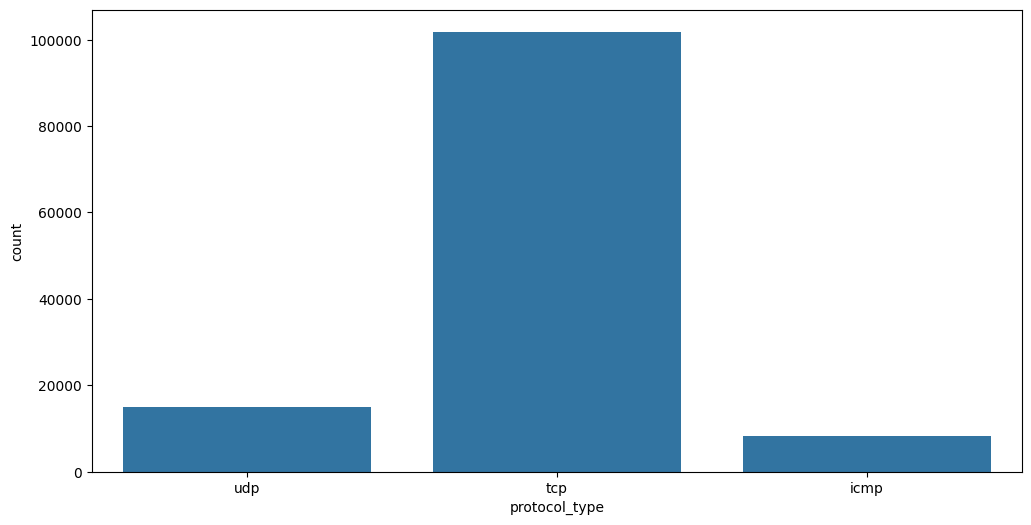

In [40]:
# Distribuição da variável tipo de protocolo
plt.figure(figsize = (12,6))
sns.countplot(x = "protocol_type", data = df_treino)
plt.show()

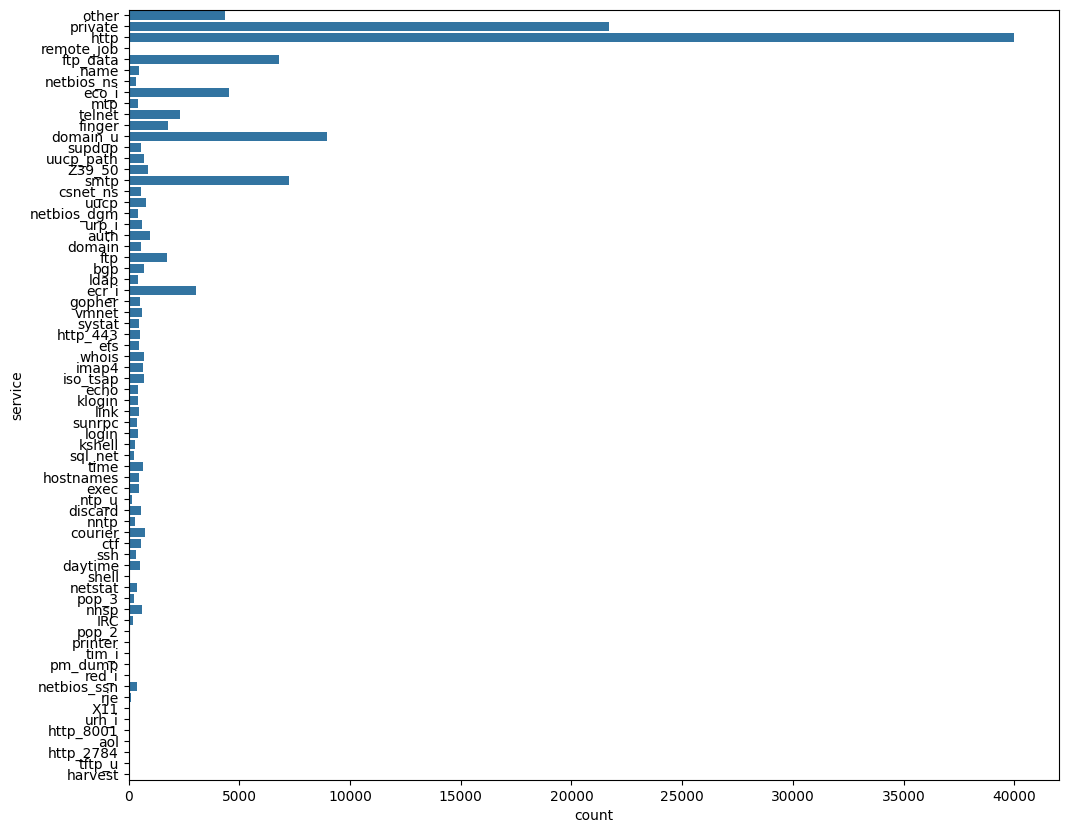

In [41]:
# Distribuição da variável service
plt.figure(figsize = (12,10))
sns.countplot(y = "service", data = df_treino)
plt.show()

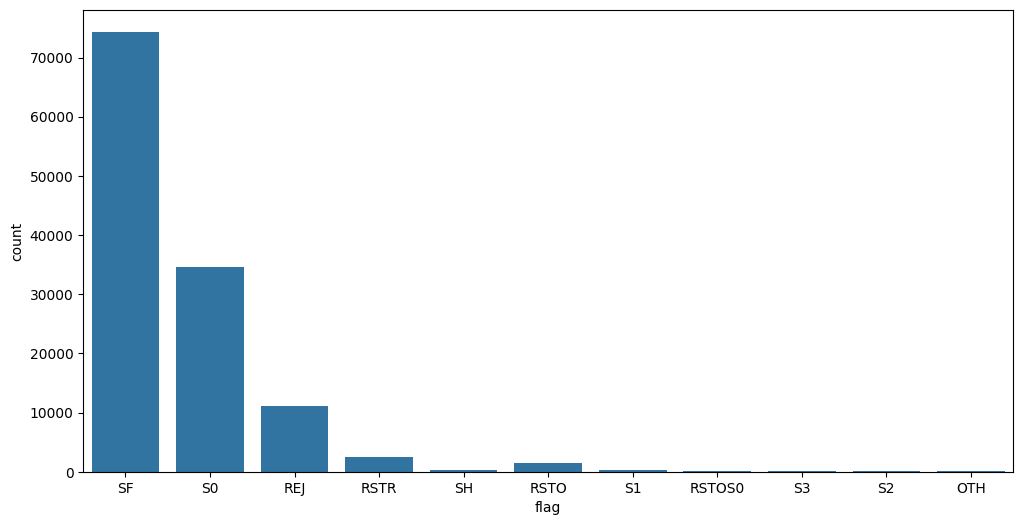

In [42]:
# Distribuição da variável flag
plt.figure(figsize = (12,6))
sns.countplot(x = "flag", data = df_treino)
plt.show()

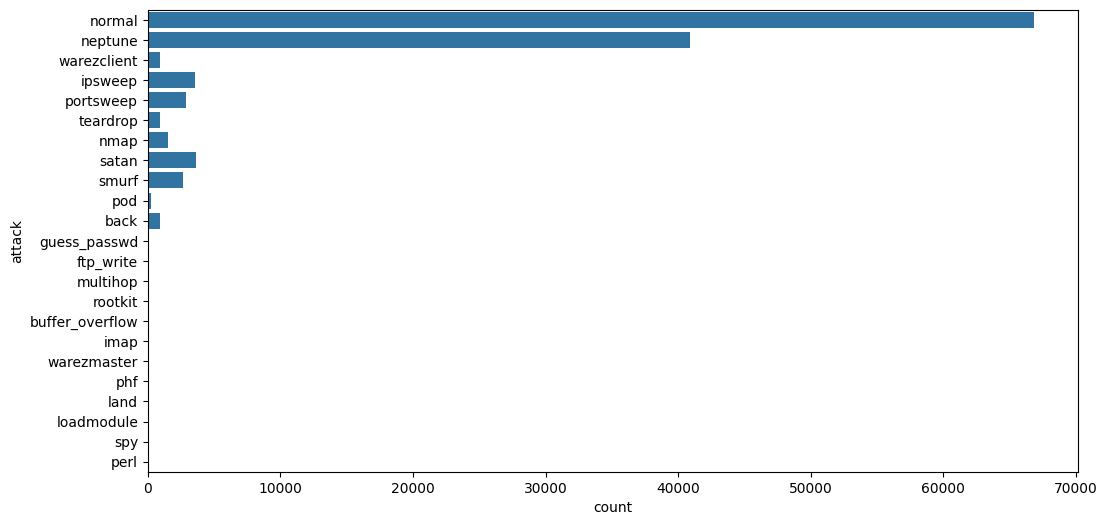

In [43]:
# Distribuição da variável com os ataques
plt.figure(figsize = (12,6))
sns.countplot(y = "attack", data = df_treino)
plt.show()

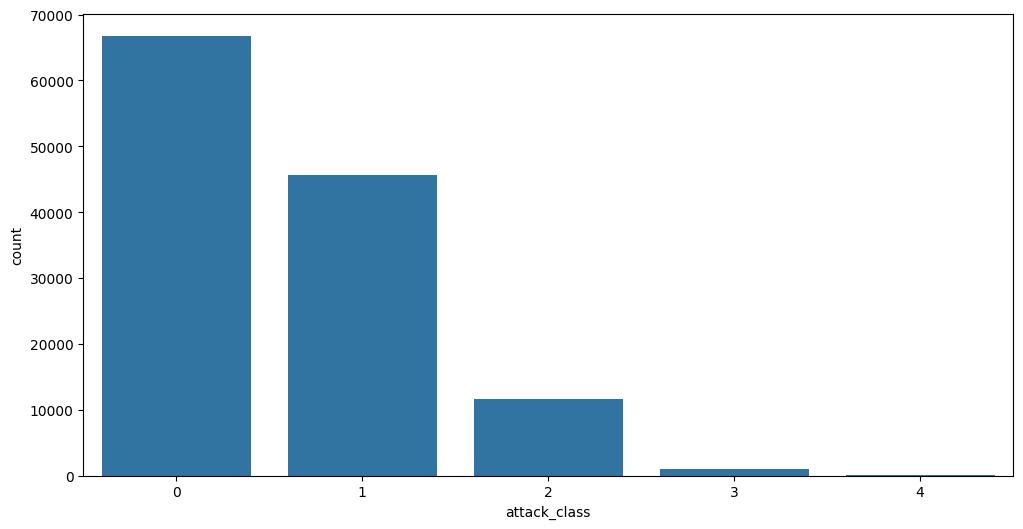

In [44]:
# Distribuição da variável de classe de ataque
plt.figure(figsize = (12,6))
sns.countplot(x = "attack_class", data = df_treino)
plt.show()

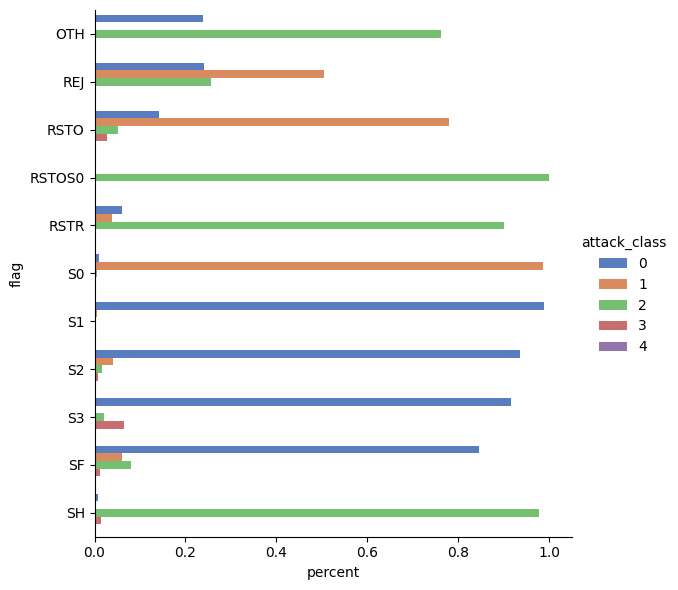

In [45]:
# Associação de flag e classe de ataque

# Agrupamento e transformação em DataFrame
flag_count = df_treino[['flag', 'attack_class']].groupby(['flag', 'attack_class']).size().reset_index(name = 'count')

# Cálculo do percentual
flag_count_percent = flag_count.groupby('flag').apply(lambda x: x.assign(percent = x['count'] / x['count'].sum())).reset_index(drop = True)

# Catplot
sns.catplot(y = "flag",
            x = 'percent',
            hue = "attack_class",
            data = flag_count_percent,
            height = 6,
            kind = "bar",
            palette = "muted")

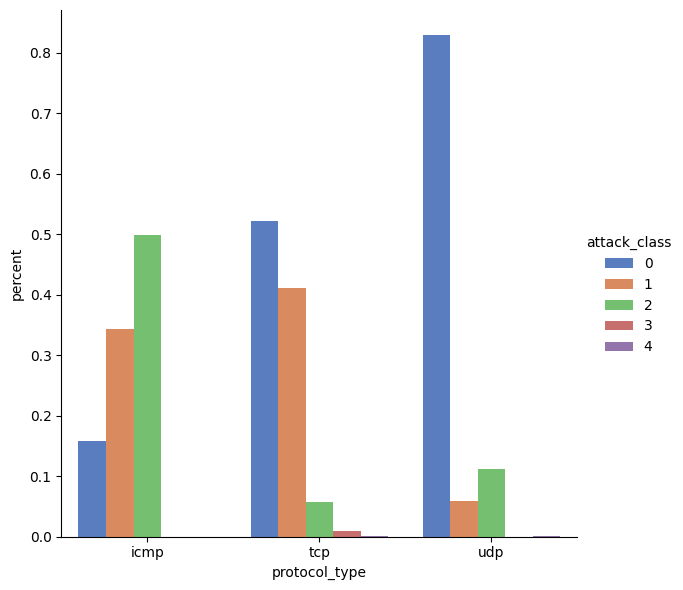

In [46]:
# Associação de tipo de protocolo e classe de ataque

# Agrupamento e conversão em DataFrame com a coluna de contagem
type_count = df_treino[['protocol_type', 'attack_class']].groupby(['protocol_type', 'attack_class']).size().reset_index(name = 'count')

# Cálculo do percentual
type_count_percent = type_count.groupby('protocol_type').apply(lambda x: x.assign(percent = x['count'] / x['count'].sum())).reset_index(drop = True)

# Catplot
sns.catplot(x = "protocol_type",
            y = 'percent',
            hue = "attack_class",
            data = type_count_percent,
            height = 6,
            kind = "bar",
            palette = "muted")

In [47]:
# Selecionando apenas colunas numéricas
df_numeric = df_treino.select_dtypes(include = [np.number])

# Média do valor de cada variável numérica para cada classe de ataque
mean_per_attack_class = df_numeric.groupby('attack_class').mean().T

# Visualizar o resultado
mean_per_attack_class.head(40)

attack_class,0,1,2,3,4
duration,169.148648,0.006276,2075.953882,626.384848,80.942308
src_bytes,13110.229206,1171.959052,269066.391744,309279.519192,906.230769
dst_bytes,4336.688156,168.520189,182279.054495,82232.683838,5141.961538
land,0.000105,0.000395,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062256,0.000000,0.000000,0.000000
urgent,0.000150,0.000000,0.000000,0.003030,0.019231
hot,0.229251,0.039719,0.001641,8.369697,1.403846
num_failed_logins,0.001392,0.000000,0.000345,0.054545,0.019231
logged_in,0.710503,0.020759,0.007168,0.915152,0.884615
num_compromised,0.505261,0.019135,0.000605,0.077778,1.211538


In [48]:
dicionario_dados["duration"]

'Duração da conexão (segundos)'

In [49]:
dicionario_dados["wrong_fragment"]

'Número de fragmentos errados'

In [50]:
dicionario_dados["num_failed_logins"]

'Número de tentativas de login falhadas'

**Análise**:

- O tempo de duração da conexão é bastante alto para alguns tipos de ataque.
- Fragmentos errados na conexão só estão presentes no ataque.
- O número de logins com falha é mais alto em alguns tipos de ataque, mas ainda ocorre em conexão normal.

## Auditoria Estatística

In [51]:
# Resumo estatístico dos dados de treino
df_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125000.0,287.701904,2.606930e+03,0.0,0.00,0.000,0.00,4.290800e+04
src_bytes,125000.0,34808.328600,4.415345e+06,0.0,0.00,44.000,276.00,1.167519e+09
dst_bytes,125000.0,19917.569400,4.036889e+06,0.0,0.00,0.000,515.00,1.309937e+09
land,125000.0,0.000200,1.414078e-02,0.0,0.00,0.000,0.00,1.000000e+00
wrong_fragment,125000.0,0.022696,2.535299e-01,0.0,0.00,0.000,0.00,3.000000e+00
urgent,125000.0,0.000112,1.442183e-02,0.0,0.00,0.000,0.00,3.000000e+00
hot,125000.0,0.204032,2.148263e+00,0.0,0.00,0.000,0.00,7.700000e+01
num_failed_logins,125000.0,0.001216,4.523868e-02,0.0,0.00,0.000,0.00,5.000000e+00
logged_in,125000.0,0.395592,4.889794e-01,0.0,0.00,0.000,1.00,1.000000e+00
num_compromised,125000.0,0.278200,2.401163e+01,0.0,0.00,0.000,0.00,7.479000e+03


In [52]:
# Resumo estatístico dos dados de treino
df_treino.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
count,125000.000000,1.250000e+05,1.250000e+05,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,...,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,287.701904,3.480833e+04,1.991757e+04,0.000200,0.022696,0.000112,0.204032,0.001216,0.395592,0.278200,...,0.521097,0.083018,0.148536,0.032575,0.284460,0.278501,0.118794,0.120271,19.503400,0.575248
std,2606.930252,4.415345e+06,4.036889e+06,0.014141,0.253530,0.014422,2.148263,0.045239,0.488979,24.011629,...,0.448945,0.189014,0.309167,0.112636,0.444783,0.445675,0.306508,0.319499,2.293169,0.694347
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,0.000000,2.760000e+02,5.150000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42908.000000,1.167519e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,4.000000


In [53]:
# Selecionando as variáveis numéricas de treino e de teste
num_var_treino = df_treino.select_dtypes(['int64', 'float64', 'int32', 'float32'])
num_var_teste = df_teste.select_dtypes(['int64', 'float64', 'int32', 'float32'])

In [54]:
num_var_treino.shape

(125000, 40)

In [55]:
num_var_teste.shape

(22500, 40)

In [56]:
# Selecionando as variáveis categóricas de treino e de teste
cat_var_treino = df_treino.select_dtypes('object')
cat_var_teste = df_teste.select_dtypes('object')

In [57]:
cat_var_treino.shape

(125000, 4)

In [58]:
cat_var_teste.shape

(22500, 4)

In [59]:
# Função para auditoria de variáveis numéricas
def dsa_func_audit_num(x):
    return pd.Series([x.count(), 
                      x.isnull().sum(), 
                      x.sum(), 
                      x.mean(), 
                      x.median(),  
                      x.std(), 
                      x.var(), 
                      x.min(), 
                      x.quantile(0.01), 
                      x.quantile(0.05),
                      x.quantile(0.10),
                      x.quantile(0.25),
                      x.quantile(0.50),
                      x.quantile(0.75), 
                      x.quantile(0.90),
                      x.quantile(0.95), 
                      x.quantile(0.99),
                      x.max()], 
                  index = ['N', 
                           'NMISS', 
                           'SUM', 
                           'MEAN',
                           'MEDIAN', 
                           'STD', 
                           'VAR', 
                           'MIN', 
                           'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [60]:
# Aplica a função nos dados de treino
num_var_treino_audit = num_var_treino.apply(dsa_func_audit_num).T.round(2)

In [61]:
# Aplica a função nos dados de teste
num_var_teste_audit = num_var_teste.apply(dsa_func_audit_num).T.round(2)

In [62]:
# Salvamos os reports em disco
num_var_treino_audit.to_csv('dados/num_var_treino_audit.csv')
num_var_teste_audit.to_csv('dados/num_var_teste_audit.csv')

In [63]:
# Função para auditoria de variáveis categóricas
def dsa_func_audit_cat(x):
    
    # Extrai a moda (valor que aparece com mais frequência)
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    
    return pd.Series([x.count(), 
                      x.isnull().sum(),
                      Mode.iloc[0, 0], 
                      Mode.iloc[0, 1], 
                      round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [64]:
# Aplica a função nos dados de treino
cat_var_treino_audit = cat_var_treino.apply(dsa_func_audit_cat).T

In [65]:
# Aplica a função nos dados de teste
cat_var_teste_audit = cat_var_teste.apply(dsa_func_audit_cat).T

In [66]:
# Salvamos os reports em disco
cat_var_treino_audit.to_csv("dados/cat_var_treino_audit.csv")
cat_var_teste_audit.to_csv("dados/cat_var_teste_audit.csv")

## Tratamento de Outliers

In [67]:
# Filtramos as variáveis com valores abaixo do percentil 1 e acima do percentil 99
num_var_treino_audit = num_var_treino_audit.apply(lambda x: x.clip(lower = x.quantile(0.01), 
                                                                   upper = x.quantile(0.99)))

In [68]:
# Filtramos as variáveis com valores abaixo do percentil 1 e acima do percentil 99
num_var_teste_audit = num_var_teste_audit.apply(lambda x: x.clip(lower = x.quantile(0.01), 
                                                                 upper = x.quantile(0.99)))

## Tratamento de Valores Ausentes
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

In [69]:
num_var_treino_audit.apply(dsa_func_audit_num).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
N,40.0,0.0,5.000000e+06,1.250000e+05,125000.00,0.000000e+00,0.000000e+00,125000.00,125000.00,125000.00,125000.00,125000.00,125000.00,125000.00,125000.00,1.250000e+05,1.250000e+05,1.250000e+05
NMISS,40.0,0.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00
SUM,40.0,0.0,6.205044e+09,1.551261e+08,16859.50,6.864932e+08,4.712729e+17,0.39,0.63,13.35,49.30,1490.25,16859.50,66829.34,15282218.40,1.586494e+08,3.182303e+09,3.625117e+09
MEAN,40.0,0.0,4.964031e+04,1.241010e+03,0.14,5.491950e+03,3.016147e+07,0.00,0.00,0.00,0.00,0.01,0.14,0.54,122.25,1.269190e+03,2.545842e+04,2.900093e+04
MEDIAN,40.0,0.0,3.306500e+02,8.270000e+00,0.00,3.050000e+01,9.301600e+02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.60,4.495000e+01,1.344400e+02,1.801200e+02
STD,40.0,0.0,8.307700e+06,2.076925e+05,0.38,9.168606e+05,8.406333e+11,0.00,0.00,0.01,0.02,0.11,0.38,2.18,111.08,2.043210e+05,4.177712e+06,4.267747e+06
VAR,40.0,0.0,3.454422e+13,8.636055e+11,0.15,3.818721e+12,1.458263e+25,0.00,0.00,0.00,0.00,0.01,0.15,4.78,12340.09,8.148302e+11,1.748675e+13,1.824774e+13
MIN,40.0,0.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00
P1,40.0,0.0,1.110000e+01,2.800000e-01,0.00,1.150000e+00,1.320000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000000e+00,4.720000e+00,7.100000e+00
P5,40.0,0.0,1.633000e+01,4.100000e-01,0.00,1.690000e+00,2.870000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.100000e+00,7.470000e+00,1.032000e+01


In [70]:
num_var_teste_audit.apply(dsa_func_audit_num).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
N,40.0,0.0,9.000000e+05,2.250000e+04,22500.00,0.000000e+00,0.000000e+00,22500.00,22500.00,22500.00,22500.00,22500.00,22500.00,22500.00,22500.00,22500.00,2.250000e+04,2.250000e+04
NMISS,40.0,0.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00
SUM,40.0,0.0,2.225747e+08,5.564368e+06,2352.51,2.623183e+07,6.881086e+14,2.34,3.77,6.95,15.50,381.10,2352.51,14438.24,3286245.40,6983244.65,1.161725e+08,1.608612e+08
MEAN,40.0,0.0,9.892210e+03,2.473100e+02,0.11,1.165860e+03,1.359228e+06,0.00,0.00,0.00,0.00,0.02,0.11,0.64,146.06,310.37,5.163230e+03,7.149390e+03
MEDIAN,40.0,0.0,5.260000e+02,1.315000e+01,0.00,4.406000e+01,1.941380e+03,0.00,0.00,0.00,0.00,0.00,0.00,0.24,22.60,59.70,2.003700e+02,2.210700e+02
STD,40.0,0.0,3.200623e+05,8.001560e+03,0.35,4.698066e+04,2.207182e+09,0.01,0.01,0.02,0.04,0.15,0.35,1.85,113.46,2398.26,1.894317e+05,2.969646e+05
VAR,40.0,0.0,1.372469e+11,3.431172e+09,0.12,2.162727e+10,4.677387e+20,0.00,0.00,0.00,0.00,0.02,0.12,5.36,12897.58,24435140.29,8.362011e+10,1.367937e+11
MIN,40.0,0.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00
P1,40.0,0.0,5.610000e+00,1.400000e-01,0.00,3.900000e-01,1.500000e-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.370000e+00,1.610000e+00
P5,40.0,0.0,1.684000e+01,4.200000e-01,0.00,1.550000e+00,2.390000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.25,7.120000e+00,7.830000e+00


> Não há valores ausentes. Nenhum tratamento é requerido.

## Preparação dos Dados e One-Hot Encoding

![DSA](imagens/One-Hot-Encoding.png)

In [71]:
df_treino.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [72]:
df_treino.shape

(125000, 44)

In [73]:
df_teste.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,2
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,2
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0


In [74]:
df_teste.shape

(22500, 44)

In [75]:
# Função para criar variáveis dummy
def dsa_func_cria_dummies(df, colname):
    
    # Cria variáveis dummy
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    
    # Concat
    df = pd.concat([df, col_dummies], axis = 1)
    
    # Drop
    df.drop(colname, axis = 1, inplace = True )
    
    return df

In [76]:
# Selecionamos as variáveis categóricas em treino
cat_var_treino = df_treino[['protocol_type', 'service', 'flag', 'attack']]

In [77]:
# Loop para aplicar One-Hot Encoding
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    cat_var_treino[c_feature] = cat_var_treino[c_feature].astype('category')
    cat_var_treino = dsa_func_cria_dummies(cat_var_treino, c_feature)

In [78]:
cat_var_treino.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
# Selecionamos as variáveis categóricas em teste
cat_var_teste = df_teste[['protocol_type', 'service', 'flag', 'attack']]

In [80]:
# Loop para aplicar One-Hot Encoding
for c_feature in ['protocol_type', 'service','flag','attack']:
    cat_var_teste[c_feature] = cat_var_teste[c_feature].astype('category')
    cat_var_teste = dsa_func_cria_dummies(cat_var_teste, c_feature)

In [81]:
cat_var_teste.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,attack_snmpgetattack,attack_snmpguess,attack_sqlattack,attack_teardrop,attack_udpstorm,attack_warezmaster,attack_worm,attack_xlock,attack_xsnoop,attack_xterm
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
cat_var_treino.shape

(125000, 103)

In [83]:
cat_var_teste.shape

(22500, 112)

O que explica essa diferença no número de colunas?

## Preparação dos Dados e Análise de Correlação

> Vamos analisar a correlação entre as variáveis.

In [84]:
# Concatena variáveis numéricas e categóricas
dados_treino_novo = pd.concat([num_var_treino, cat_var_treino], axis = 1)

In [85]:
dados_treino_novo.shape

(125000, 143)

In [86]:
# Concatena variáveis numéricas e categóricas
dados_teste_novo = pd.concat([num_var_teste, cat_var_teste], axis = 1)

In [87]:
dados_teste_novo.shape

(22500, 152)

In [88]:
# Matriz de Correlação
matriz_corr = dados_treino_novo.corr()

In [89]:
matriz_corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.060371,0.034979,-0.001561,-0.009880,0.003840,0.000710,0.009627,-0.064259,0.042299,...,-0.000615,-0.004429,0.471874,-0.000641,-0.019034,-0.016167,0.000046,-0.009319,0.013242,-0.001323
src_bytes,0.060371,1.000000,0.000284,-0.000112,-0.000703,-0.000060,0.000635,-0.000210,-0.002478,-0.000085,...,-0.000045,-0.000303,0.036217,-0.000070,-0.001360,-0.001125,-0.000031,-0.000665,0.005942,-0.000100
dst_bytes,0.034979,0.000284,1.000000,-0.000070,-0.000442,0.000248,-0.000345,0.000507,-0.002909,0.001231,...,-0.000017,-0.000198,0.026975,-0.000035,-0.000851,-0.000723,-0.000019,-0.000417,-0.000400,0.012228
land,-0.001561,-0.000112,-0.000070,1.000000,-0.001266,-0.000110,-0.001343,-0.000380,-0.011442,-0.000164,...,-0.000080,-0.000568,-0.002184,-0.000127,-0.002440,-0.002072,-0.000057,-0.001194,-0.001196,-0.000179
wrong_fragment,-0.009880,-0.000703,-0.000442,-0.001266,1.000000,-0.000695,-0.008502,-0.002406,-0.072424,-0.001037,...,-0.000506,0.152339,-0.013821,-0.000801,-0.015447,-0.013114,-0.000358,0.985621,-0.007568,-0.001132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.016167,-0.001125,-0.000723,-0.002072,-0.013114,-0.001138,-0.013913,-0.003938,-0.118512,-0.001697,...,-0.000829,-0.005879,-0.022616,-0.001310,-0.025276,1.000000,-0.000586,-0.012370,-0.012384,-0.001853
attack_spy,0.000046,-0.000031,-0.000019,-0.000057,-0.000358,-0.000031,-0.000380,-0.000108,0.000854,-0.000046,...,-0.000023,-0.000161,-0.000618,-0.000036,-0.000690,-0.000586,1.000000,-0.000338,-0.000338,-0.000051
attack_teardrop,-0.009319,-0.000665,-0.000417,-0.001194,0.985621,-0.000656,-0.008020,-0.002270,-0.068315,-0.000978,...,-0.000478,-0.003389,-0.013037,-0.000755,-0.014570,-0.012370,-0.000338,1.000000,-0.007139,-0.001068
attack_warezclient,0.013242,0.005942,-0.000400,-0.001196,-0.007568,-0.000657,0.354746,-0.002272,0.104495,-0.000979,...,-0.000478,-0.003393,-0.013051,-0.000756,-0.014587,-0.012384,-0.000338,-0.007139,1.000000,-0.001069


In [90]:
# Salva em disco
matriz_corr.to_csv('dados/matriz_corr.csv')

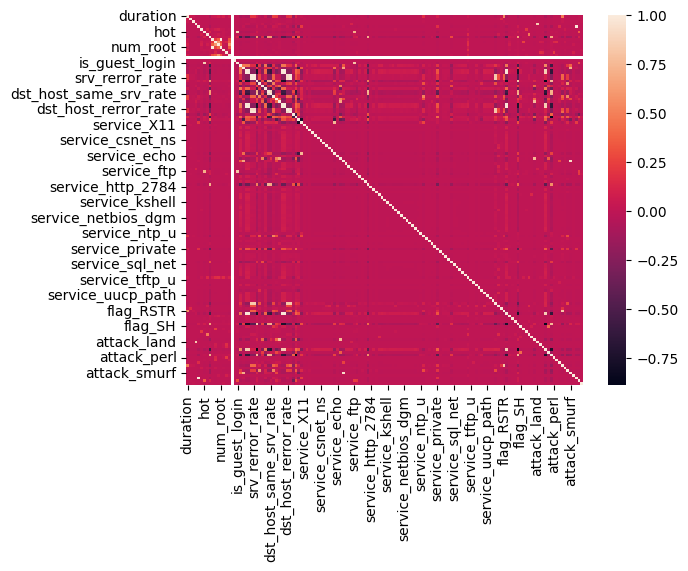

In [91]:
# Heatmap para visualizar o mapa de correlação
sns.heatmap(matriz_corr);

Descartando colunas com base no relatório de auditoria de dados:

- Baseado em baixa variância (perto de zero variância).
- Altas correlações entre duas variáveis numéricas.

In [92]:
# Colunas que serão descartadas nos dados de treino
dados_treino_novo.drop(columns = ['land',
                                  'wrong_fragment',
                                  'urgent',
                                  'num_failed_logins',
                                  "root_shell",
                                  "su_attempted",
                                  "num_root",
                                  "num_file_creations",
                                  "num_shells",
                                  "num_access_files",
                                  "num_outbound_cmds",
                                  "is_host_login",
                                  "is_guest_login",
                                  'dst_host_rerror_rate',
                                  'dst_host_serror_rate',
                                  'dst_host_srv_rerror_rate',
                                  'dst_host_srv_serror_rate',
                                  'num_root',
                                  'num_outbound_cmds',
                                  'srv_rerror_rate',
                                  'srv_serror_rate'], 
                       axis = 1, 
                       inplace = True)

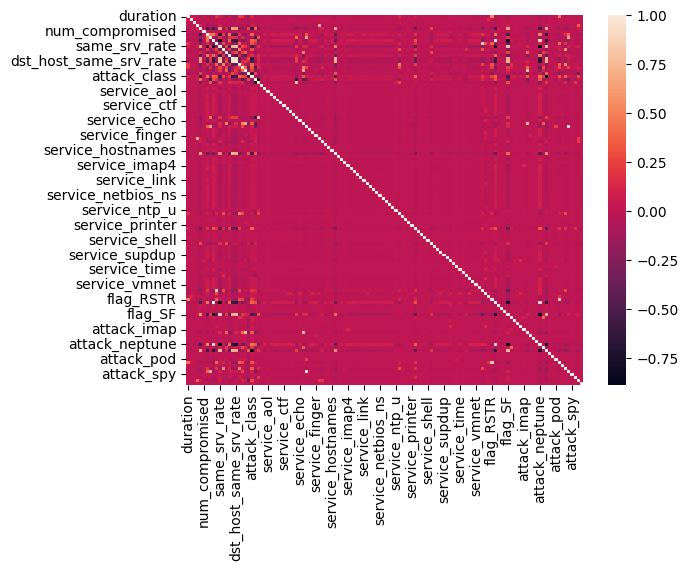

In [93]:
# Heatmap para visualizar o mapa de correlação
sns.heatmap(dados_treino_novo.corr());

In [94]:
dados_treino_novo.shape

(125000, 124)

In [95]:
dados_teste_novo.shape

(22500, 152)

Não podemos permitir essa diferença no número de colunas. Trataremos disso mais a frente!

# Aqui começa a segunda parte do Projeto 2.

### Seleção de Variáveis com K-Best

Veja a descrição no videobook do Capítulo 5 do curso.

In [96]:
dados_treino_novo.shape

(125000, 124)

In [97]:
dados_treino_novo.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,rerror_rate,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,146,0,0,0,0,13,1,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,123,6,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0,232,8153,0,1,0,5,5,0.2,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0,199,420,0,1,0,30,32,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,121,19,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [98]:
# X vai conter as variáveis preditoras
X = dados_treino_novo[dados_treino_novo.columns.difference(['attack_class'])]

In [99]:
# Cria o modelo
X_novo = SelectKBest(f_classif, k = 15).fit(X, dados_treino_novo['attack_class'])

In [100]:
# Variáveis relevantes têm suporte igual ao True
X_novo.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [101]:
# Importância das variáveis (fatores que mais influenciam nos ataques de invasão de rede)
KBest_features = X.columns[X_novo.get_support()]

In [102]:
KBest_features

Index(['attack_buffer_overflow', 'attack_neptune', 'attack_normal',
       'attack_warezclient', 'count', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

> Preparamos o dataframe com os atributos finais.

Nota: A variável **attack_warezclient** não existe em teste e por isso não será usada no treinamento dos modelos.

In [103]:
# Atributos que serão usados na modelagem
atributos_finais = ['attack_buffer_overflow',
                    'attack_neptune',
                    'attack_normal',
                    'count',
                    'dst_host_same_src_port_rate',
                    'dst_host_same_srv_rate',
                    'dst_host_srv_count',
                    'flag_S0',
                    'flag_SF',
                    'last_flag',
                    'logged_in',
                    'same_srv_rate',
                    'serror_rate',
                    'service_http']

In [104]:
X_treino = dados_treino_novo[atributos_finais]
y_treino = dados_treino_novo['attack_class']

In [105]:
X_treino.shape

(125000, 14)

In [106]:
X_teste = dados_teste_novo[atributos_finais]
y_teste = dados_teste_novo['attack_class']

In [107]:
X_teste.shape

(22500, 14)

## Modelagem

Vamos construir os seguintes modelos (em alguns casos de forma combinada):

- LogisticRegression
- RidgeClassifier
- SGDClassifier
- KNeighborsClassifier
- LinearDiscriminantAnalysis
- RandomForestClassifier
- BaggingClassifier
- ExtraTreesClassifier
- AdaBoostClassifier
- GradientBoostingClassifier
- VotingClassifier
- DecisionTreeClassifier
- DecisionTreeRegressor
- MLPClassifier
- SVC

A lista acima é apenas para referência e a ordem dos modelos criados será diferente. Os resultados na sua máquina podem ser ligeiramente diferentes devido à precisão de cálculo do processador (CPU).

### 1- Logistic Regression

Regressão logística é um tipo de modelo de aprendizado de máquina usado para prever um resultado binário (sim / não, verdadeiro / falso) a partir de um conjunto de variáveis preditoras. É amplamente utilizado em diversas áreas, como marketing, finanças e saúde, para identificar a probabilidade de um evento ocorrer. Quando usado para prever mais do que duas classes chamamos de regressão logística multiclasse.

A regressão logística funciona calculando a probabilidade de um evento ocorrer com base nas características dos dados de treinamento. Essas probabilidades são então convertidas em classificações binárias (sim / não, verdadeiro / falso) usando um limite de probabilidade pré-determinado. Por exemplo, se a probabilidade de um evento ocorrer for maior do que o limite de probabilidade, o modelo pode classificá-lo como "verdadeiro", caso contrário, como "falso".

A regressão logística é um modelo de classificação, o que significa que é mais adequado para prever resultados categóricos do que prever valores contínuos, como preços de ações ou temperaturas. É um modelo de aprendizado supervisionado, o que significa que precisa de um conjunto de dados de treinamento rotulados para aprender a fazer previsões precisas.

In [108]:
# Cria o modelo
modelo_v1 = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 0)

In [109]:
# Treina o modelo
modelo_v1.fit(X_treino, y_treino)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [110]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)  

In [111]:
# Associa os coeficientes aos atributos
list( zip( atributos_finais, modelo_v1.coef_[0] ) )

[('attack_buffer_overflow', np.float64(-0.00788173862207135)),
 ('attack_neptune', np.float64(-1.0154116403152766)),
 ('attack_normal', np.float64(4.560018308983729)),
 ('count', np.float64(0.11458708270449372)),
 ('dst_host_same_src_port_rate', np.float64(-1.2403427908429174)),
 ('dst_host_same_srv_rate', np.float64(-0.5499634673598834)),
 ('dst_host_srv_count', np.float64(0.09452368519017004)),
 ('flag_S0', np.float64(-0.6172823031326086)),
 ('flag_SF', np.float64(0.1758982554030984)),
 ('last_flag', np.float64(0.36742993369432186)),
 ('logged_in', np.float64(0.46853946456728773)),
 ('same_srv_rate', np.float64(-0.2652832505955429)),
 ('serror_rate', np.float64(-0.6546018060700003)),
 ('service_http', np.float64(0.07505374737015559))]

In [112]:
# Intercepto
modelo_v1.intercept_

array([-1.0765637 ,  0.27168754,  0.44281612,  0.40077909, -0.03871904])

In [113]:
# Acurácia em treino
modelo_v1.score(X_treino, y_treino)

0.977144

In [114]:
# Acurácia em teste
accuracy_score(y_teste, y_pred_v1)

0.8576444444444444

### 2- Ridge Classifier

Classificação ridge é um tipo de modelo de aprendizado de máquina que é usado para prever a classe de um item baseado em um conjunto de características. É um tipo de modelo de classificação, o que significa que é mais adequado para prever resultados categóricos do que prever valores contínuos, como preços de ações ou temperaturas.

Classificação ridge é baseada em um modelo de regressão linear, que tenta prever a saída de um conjunto de características usando uma combinação linear de pesos. No entanto, a classificação ridge adiciona uma penalidade L2 às somas de quadrados dos pesos para evitar overfitting. Isso significa que o modelo não se ajustará muito bem aos dados de treinamento, mas deverá ter um desempenho melhor em conjuntos de dados novos e não vistos.

In [115]:
modelo_v2 = RidgeClassifier().fit(X_treino, y_treino)

In [116]:
y_pred_v2 = modelo_v2.predict(X_teste)

In [117]:
modelo_v2.score(X_treino, y_treino)

0.968296

In [118]:
accuracy_score(y_teste, y_pred_v2)

0.7593333333333333

### 3- K-Nearest Neighbors

O modelo K-Nearest Neighbors (KNN) é um tipo de modelo de aprendizado de máquina usado para classificação e regressão. 

O modelo KNN funciona comparando o novo item a classificar ou a prever com os itens mais próximos em seu conjunto de dados de treinamento. O número de itens mais próximos a serem comparados é especificado pelo usuário e é chamado de hiperparâmetro "K". O modelo então atribui ao novo item a classe ou valor mais comum entre os K itens mais próximos.

O modelo KNN é simples de implementar e pode ser usado para classificação ou regressão, mas pode ser lento para fazer previsões em conjuntos de dados grandes. Também é sensível à escala das características, o que significa que as características com valores muito grandes ou pequenos podem afetar o modelo de maneira desproporcional. No entanto, é uma opção viável para conjuntos de dados pequenos ou de médio porte com poucas características.

In [119]:
modelo_v3 = KNeighborsClassifier(n_neighbors = 3)

In [120]:
modelo_v3.fit(X_treino, y_treino)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [121]:
y_pred_v3 = modelo_v3.predict(X_teste)

In [122]:
modelo_v3.score(X_treino, y_treino)

0.995536

In [123]:
accuracy_score(y_teste, y_pred_v3)

0.784

### 4- Linear Discriminant Analysis

Discriminant Analysis é um tipo de modelo de aprendizado de máquina usado para classificação. É um tipo de modelo de aprendizado supervisionado, o que significa que é treinado com um conjunto de dados rotulados para fazer previsões precisas sobre novos dados.

A análise discriminante é baseada em uma análise estatística que tenta encontrar as características que melhor separam os itens em diferentes classes. 

Existem dois tipos principais de análise discriminante: linear e quadrática. A análise discriminante linear assume que as classes são separadas por uma linha reta, enquanto a análise discriminante quadrática assume que as classes são separadas por uma curva quadrática. Ambos os tipos de análise discriminante são amplamente utilizados e podem ser ajustados usando hiperparâmetros para obter melhores resultados.

A análise discriminante é um modelo simples e eficiente que pode ser usado para classificação, mas é mais adequada para conjuntos de dados com poucas características e classes distintas bem separadas. É menos adequado para conjuntos de dados com muitas características ou classes mal definidas.

In [124]:
modelo_v4 = LinearDiscriminantAnalysis()

In [125]:
modelo_v4.fit(X_treino, y_treino) 

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [126]:
y_pred_v4 = modelo_v4.predict(X_teste)

In [127]:
modelo_v4.score(X_treino, y_treino)

0.943736

In [128]:
accuracy_score(y_teste, y_pred_v4)

0.7612444444444444

### 5-  Decision Tree Classifier

Árvores de decisão são um tipo de modelo de aprendizado de máquina usado para classificação e regressão. São um tipo de modelo de aprendizado supervisionado, o que significa que são treinados com um conjunto de dados rotulados para fazer previsões precisas sobre novos dados.

Árvores de decisão funcionam criando uma série de perguntas simples sobre os dados de treinamento que levam a uma previsão. Cada pergunta é feita sobre uma característica do conjunto de dados e a resposta determina qual pergunta é feita a seguir. Esse processo é repetido até que se chegue a uma previsão final.

As árvores de decisão são fáceis de entender e implementar, mas podem ser propensas ao overfitting se forem muito profundas ou complexas. No entanto, existem técnicas como poda de árvores e regularização que podem ajudar a reduzir o overfitting e melhorar o desempenho do modelo.

In [129]:
modelo_v5 = DecisionTreeClassifier(max_depth = 5)

In [130]:
modelo_v5 = modelo_v5.fit(X_treino, y_treino)

In [131]:
y_pred_v5 = modelo_v5.predict(X_teste)

In [132]:
modelo_v5.score(X_treino, y_treino)

0.99172

In [133]:
accuracy_score(y_teste, y_pred_v5)

0.8872

> Esse modelo parece promissor. Vamos buscar os hiperperâmetros ideais para esse algoritmo.

In [134]:
# Grid de hiperparâmetros
param_grid = {'max_depth': np.arange(3, 12),
              'max_features': np.arange(3, 15)}

Grid search é um método de otimização de hiperparâmetros em aprendizado de máquina. Os hiperparâmetros são configurações do modelo que precisam ser definidas pelo usuário antes de treinar o modelo. Eles são diferentes dos parâmetros do modelo, que são aprendidos a partir dos dados de treinamento.

O grid search permite definir um conjunto de hiperparâmetros possíveis e, em seguida, treinar e avaliar o modelo para cada combinação possível de hiperparâmetros. Isso é feito criando uma grade de todas as combinações possíveis de hiperparâmetros e, em seguida, treinando e avaliando o modelo para cada combinação na grade. O grid search retorna a combinação de hiperparâmetros que obteve o melhor desempenho.

O grid search é uma técnica útil para encontrar a melhor combinação de hiperparâmetros para um modelo, mas pode ser computacionalmente intensivo, especialmente para modelos com muitos hiperparâmetros ou conjuntos de dados grandes. No entanto, é uma técnica comumente usada em aprendizado de máquina para otimizar o desempenho de um modelo.

In [135]:
# Grid Search
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, verbose = 1, n_jobs = -1)

Vamos treinar o grid search.

In [136]:
%%time
tree.fit(X_treino, y_treino)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 303 ms, sys: 685 ms, total: 988 ms
Wall time: 2.99 s


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': array([ 3, 4..., 9, 10, 11]), 'max_features': array([ 3, 4..., 12, 13, 14])}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [137]:
tree.best_score_

np.float64(0.998104)

In [138]:
tree.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,np.int64(11)
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,np.int64(12)
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [139]:
tree.best_params_

{'max_depth': np.int64(11), 'max_features': np.int64(12)}

In [140]:
train_pred = tree.predict(X_treino)

In [141]:
print(metrics.classification_report(y_treino, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66809
           1       1.00      1.00      1.00     45570
           2       0.99      0.99      0.99     11579
           3       0.99      0.99      0.99       990
           4       0.96      0.83      0.89        52

    accuracy                           1.00    125000
   macro avg       0.99      0.96      0.97    125000
weighted avg       1.00      1.00      1.00    125000



In [142]:
test_pred = tree.predict(X_teste)

In [143]:
print(metrics.classification_report(y_teste, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9694
           1       0.86      0.91      0.88      7442
           2       0.65      0.75      0.70      2415
           3       0.75      0.55      0.63      2883
           4       0.39      0.23      0.29        66

    accuracy                           0.88     22500
   macro avg       0.73      0.69      0.70     22500
weighted avg       0.88      0.88      0.88     22500



> Vamos criar a versão final do modelo_v5.

In [144]:
# Versão final do modelo com os melhores hiperparâmetros aprendidos no Grid Search
modelo_v5_final = DecisionTreeClassifier(max_depth = 11, max_features = 12)

In [145]:
modelo_v5_final.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,12
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [146]:
X_treino.columns

Index(['attack_buffer_overflow', 'attack_neptune', 'attack_normal', 'count',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_S0', 'flag_SF', 'last_flag', 'logged_in',
       'same_srv_rate', 'serror_rate', 'service_http'],
      dtype='object')

In [147]:
modelo_v5_final.feature_importances_

array([2.52485931e-04, 1.67494594e-01, 7.20056569e-01, 3.70926054e-02,
       7.78061673e-03, 5.29419276e-03, 2.89729801e-02, 3.65849053e-04,
       7.56430815e-04, 3.08050476e-03, 1.75174168e-02, 7.48444489e-03,
       1.07532337e-03, 2.77598634e-03])

In [148]:
# Mapa de atributos
feature_map = [(i, v) for i, v in itertools.zip_longest(X_treino.columns, modelo_v5_final.feature_importances_)]

In [149]:
feature_map

[('attack_buffer_overflow', np.float64(0.0002524859310592849)),
 ('attack_neptune', np.float64(0.16749459421506946)),
 ('attack_normal', np.float64(0.7200565688094325)),
 ('count', np.float64(0.03709260542569242)),
 ('dst_host_same_src_port_rate', np.float64(0.00778061672804161)),
 ('dst_host_same_srv_rate', np.float64(0.005294192761546838)),
 ('dst_host_srv_count', np.float64(0.028972980138905625)),
 ('flag_S0', np.float64(0.00036584905272507313)),
 ('flag_SF', np.float64(0.0007564308148224232)),
 ('last_flag', np.float64(0.0030805047609774767)),
 ('logged_in', np.float64(0.01751741676138427)),
 ('same_srv_rate', np.float64(0.007484444886278292)),
 ('serror_rate', np.float64(0.0010753233732077481)),
 ('service_http', np.float64(0.00277598634085668))]

In [150]:
Feature_importance = pd.DataFrame(feature_map, columns = ['Feature', 'importance'])

In [151]:
Feature_importance.sort_values('importance', inplace = True, ascending = False)

In [152]:
Feature_importance

,Feature,importance
2,attack_normal,0.720057
1,attack_neptune,0.167495
3,count,0.037093
6,dst_host_srv_count,0.028973
10,logged_in,0.017517
4,dst_host_same_src_port_rate,0.007781
11,same_srv_rate,0.007484
5,dst_host_same_srv_rate,0.005294
9,last_flag,0.003081
13,service_http,0.002776


In [153]:
tree_test_pred = pd.DataFrame( { 'observado':  y_teste, 'previsto': modelo_v5_final.predict(X_teste) } )

In [154]:
tree_test_pred.sample(n = 10)

,observado,previsto
3518,0,0
4549,1,1
3593,0,0
1757,1,1
15442,1,1
20446,0,0
22027,0,0
2789,0,0
4464,0,0
21298,2,2


In [155]:
accuracy_score(tree_test_pred.observado, tree_test_pred.previsto)

0.8855555555555555

## 6- Random Forest

Random Forest é um tipo de modelo de aprendizado de máquina usado para classificação e regressão. É um tipo de modelo de aprendizado supervisionado, o que significa que é treinado com um conjunto de dados rotulados para fazer previsões precisas sobre novos dados.

Random Forest é uma técnica de ensemble, o que significa que é formada por múltiplos modelos de aprendizado de máquina que trabalham em conjunto para fazer previsões. Cada modelo na floresta aleatória é uma árvore de decisão treinada em um conjunto de dados aleatório. As previsões de cada árvore são então combinadas para fazer uma previsão final.

Random Forest é um modelo muito robusto e tem um bom desempenho em muitos conjuntos de dados. Ele também é resistente ao overfitting, pois as previsões de cada árvore na floresta são combinadas, o que suaviza os erros individuais das árvores. No entanto, pode ser um pouco mais lento para fazer previsões do que alguns modelos mais simples, como a regressão logística.

In [156]:
# Grid de hiperparâmetros
pargrid_rf = {'n_estimators': [50,60,70,80,90,100], 'max_features': [2,3,4,5,6,7]}

In [157]:
# Grid search
gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = pargrid_rf,
                       cv = 10,
                       verbose = True, 
                       n_jobs = -1)

In [158]:
%%time
gscv_results = gscv_rf.fit(X_treino, y_treino)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
CPU times: user 2.29 s, sys: 1.14 s, total: 3.43 s
Wall time: 40.1 s


In [159]:
gscv_results.best_params_

{'max_features': 7, 'n_estimators': 80}

In [160]:
gscv_rf.best_score_

np.float64(0.99888)

In [161]:
modelo_v6 = RandomForestClassifier(oob_score = True, n_estimators = 100, max_features = 7, n_jobs = -1)

In [162]:
modelo_v6.fit(X_treino, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [163]:
y_pred_v6 = modelo_v6.predict(X_teste)

In [164]:
modelo_v6.score(X_treino, y_treino)

0.999608

In [165]:
accuracy_score(y_teste, y_pred_v6)

0.9012444444444444

> Vamos verificar as variáveis mais importantes de acordo com o modelo Random Forest.

In [166]:
print(modelo_v6.feature_importances_)

[4.81425420e-04 2.54810337e-01 4.83091557e-01 4.99439170e-02
 2.12069414e-02 1.54849638e-02 1.60506303e-02 2.29133122e-02
 2.31750273e-02 2.25560561e-02 1.63798254e-02 6.52867372e-02
 4.56874737e-03 4.05052223e-03]


In [167]:
print(np.argsort(modelo_v6.feature_importances_))

[ 0 13 12  5  6 10  4  9  7  8  3 11  1  2]


In [168]:
indices = np.argsort(modelo_v6.feature_importances_)[::-1]

In [169]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )

In [170]:
# Loop
for f in range(X_treino.shape[1]):
    feature_rank.loc[f] = [f+1,
                           X_treino.columns[indices[f]],
                           modelo_v6.feature_importances_[indices[f]]]

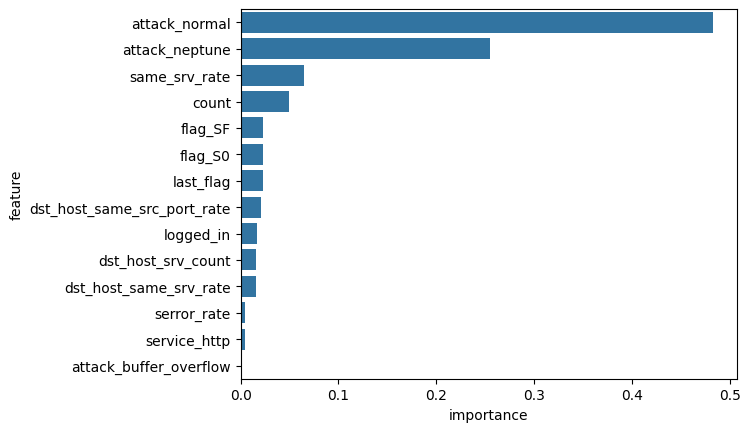

In [171]:
sns.barplot(y = 'feature', x = 'importance', data = feature_rank);

### 7- Stochastic Gradient Classifier

Stochastic Gradient Classifier é um tipo de modelo de aprendizado de máquina usado para classificação. É um tipo de modelo de aprendizado supervisionado, o que significa que é treinado com um conjunto de dados rotulados para fazer previsões precisas sobre novos dados.

O Stochastic Gradient Classifier é baseado em um modelo de regressão linear, o que significa que tenta prever a saída de um conjunto de características usando uma combinação linear de pesos. No entanto, ao contrário da regressão linear, que treina os pesos usando todo o conjunto de dados de treinamento de uma só vez, o Stochastic Gradient Classifier atualiza os pesos usando apenas uma amostra de treinamento de cada vez. Isso é chamado de treinamento estocástico.

O Stochastic Gradient Classifier é um modelo simples e eficiente que pode ser treinado rapidamente, mesmo em conjuntos de dados muito grandes. No entanto, é menos preciso do que alguns modelos mais complexos e pode ser propenso ao overfitting se não for regularizado adequadamente. 

In [172]:
modelo_v7 = SGDClassifier(loss = "hinge", penalty = "l2")

In [173]:
modelo_v7.fit(X_treino, y_treino)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [174]:
y_pred_v7 = modelo_v7.predict(X_teste)

In [175]:
# Acurácia em treino
modelo_v7.score(X_treino, y_treino)

0.953016

In [176]:
accuracy_score(y_teste, y_pred_v7)

0.7840888888888888

> Vamos otimizar os hiperparâmetros.

In [177]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []

In [178]:
%%time
for n_iter in n_iters:
    model = SGDClassifier(loss = "hinge", penalty = "l2", max_iter = n_iter)
    model.fit(X_treino, y_treino)
    scores.append(model.score(X_teste, y_teste))

CPU times: user 2.81 s, sys: 21.6 ms, total: 2.83 s
Wall time: 2.83 s


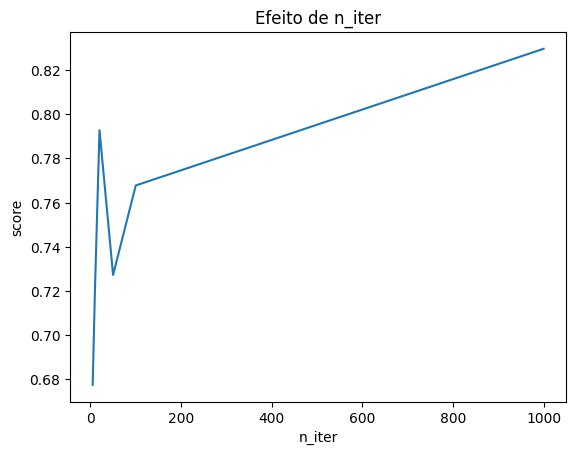

In [179]:
plt.title("Efeito de n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

> Vamos otimizar um pouco mais os hiperparâmetros.

In [180]:
# losses
losses = ["hinge", "log_loss", "squared_hinge", "modified_huber"]
scores = []

In [181]:
%%time
scores = []
for loss in losses:
    model = SGDClassifier(loss = loss, penalty = "l2", max_iter = 1000)
    model.fit(X_treino, y_treino)
    scores.append(model.score(X_teste, y_teste))

CPU times: user 8.44 s, sys: 28.1 ms, total: 8.47 s
Wall time: 8.47 s


In [182]:
scores

[0.8111555555555555,
 0.8135555555555556,
 0.8178222222222222,
 0.8164444444444444]

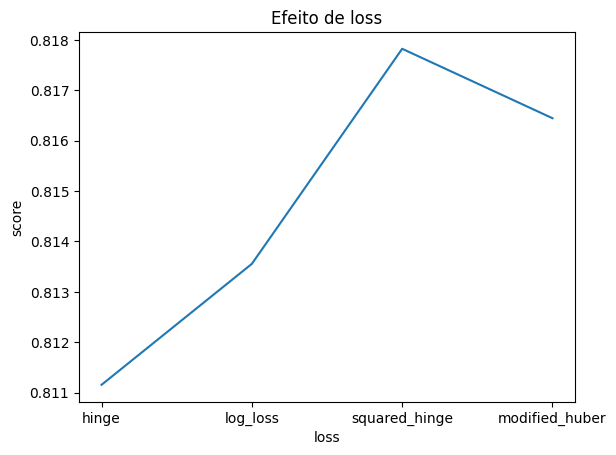

In [183]:
plt.xlabel("loss")
plt.ylabel("score")
plt.title("Efeito de loss")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores)
plt.show();

> Ainda não estou satisfeito. Vamos otimizar um pouco mais os hiperparâmetros.

In [184]:
# Grid
params = {"loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber"],
          "alpha" : [0.0001, 0.001, 0.01, 0.1],
          "penalty" : ["l2", "l1", "none"]}

In [185]:
modelo_sgd = SGDClassifier(max_iter = 100)

In [186]:
# Grid search
modelo_v7_final = GridSearchCV(modelo_sgd, param_grid = params)

In [187]:
%%time
modelo_v7_final.fit(X_treino, y_treino)

CPU times: user 2min 5s, sys: 665 ms, total: 2min 6s
Wall time: 2min 6s


,estimator,SGDClassifier(max_iter=100)
,param_grid,"{'alpha': [0.0001, 0.001, ...], 'loss': ['hinge', 'log_loss', ...], 'penalty': ['l2', 'l1', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [188]:
# Acurácia em treino
modelo_v7_final.score(X_treino, y_treino)

0.976736

In [189]:
y_pred_v7  = modelo_v7_final.predict(X_teste)

In [190]:
accuracy_score(y_teste, y_pred_v7)

0.8494222222222222

### 8- Neural Network 

Usaremos para este modelo o MLPClassifier.

MLPClassifier é uma classe de treinamento de modelos de aprendizado de máquina. Ela é usada para treinar modelos de rede neural artificial (ANN) para classificação.

Uma rede neural artificial é um modelo de aprendizado de máquina que é inspirado na forma como o cérebro humano processa informações. Ela é composta por camadas de neurônios interconectados que processam os dados de entrada e geram uma saída. A MLPClassifier é uma implementação de uma rede neural artificial de camadas múltiplas (MLP), o que significa que é composta por pelo menos três camadas: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída.

A MLPClassifier é um modelo de aprendizado supervisionado, o que significa que é treinado com um conjunto de dados rotulados para fazer previsões precisas sobre novos dados. Ele é capaz de lidar com dados numéricos e categóricos e é amplamente utilizado em diversas áreas para identificar a probabilidade de um evento ocorrer.

In [191]:
# Cria o padronizador
scaler = StandardScaler()

In [192]:
# Treina o padronizador
scaler.fit(X_treino)

,copy,True
,with_mean,True
,with_std,True


In [193]:
# Aplicamos o padronizador aos dados de treino e teste
X_treino_mlp = scaler.transform(X_treino)
X_teste_mlp = scaler.transform(X_teste)

In [194]:
modelo_v8 = MLPClassifier(hidden_layer_sizes = (30,30,30))

In [195]:
modelo_v8.fit(X_treino_mlp, y_treino)

,hidden_layer_sizes,"(30, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [196]:
y_pred_v8 = modelo_v8.predict(X_teste_mlp)

In [197]:
print(confusion_matrix(y_teste, y_pred_v8))

[[9647    0   47    0    0]
 [   0 6799  145  498    0]
 [   0  168 2225   22    0]
 [  79   33  713 2035   23]
 [   0    0   14   28   24]]


In [198]:
print(classification_report(y_teste, y_pred_v8))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9694
           1       0.97      0.91      0.94      7442
           2       0.71      0.92      0.80      2415
           3       0.79      0.71      0.74      2883
           4       0.51      0.36      0.42        66

    accuracy                           0.92     22500
   macro avg       0.79      0.78      0.78     22500
weighted avg       0.93      0.92      0.92     22500



In [199]:
# Acurácia em treino
modelo_v8.score(X_treino_mlp, y_treino)

0.9986

In [200]:
accuracy_score(y_teste, y_pred_v8)

0.9213333333333333

## Combinação de Algoritmos com Métodos Ensemble

Os três métodos mais populares para combinar as previsões de diferentes algoritmos são:

**Bagging** -> Construir vários modelos (normalmente do mesmo tipo) de diferentes subamostras do conjunto de dados de treinamento.

**Boosting** -> Construir vários modelos (normalmente do mesmo tipo), cada um dos quais aprende a corrigir os erros de previsão de um modelo anterior na cadeia.

**Voting** -> Construir vários modelos (normalmente de tipos diferentes) e estatísticas simples (como a média) são usados para combinar previsões.

### Método Ensemble Bagging

Bootstrap Aggregation ou Bagging envolve coletar várias amostras de seu conjunto de dados de treinamento (com substituição) e treinar um modelo para cada amostra.

A previsão de saída final é calculada como a média entre as previsões de todos os submodelos.

Vamos criar 2 modelos de Bagging:

1) Bagged Decision Trees

2) Extra Trees

Outra opção seria o Random Forest, mas esse já criamos anteriormente.

### 9- Bagged Decision Trees

O Bagging funciona melhor com algoritmos que possuem alta variância. Um exemplo popular são as árvores de decisão, muitas vezes construídas sem podas.

In [201]:
# Define a organização do modelo
num_trees = 100
kfold = KFold(n_splits = 10, random_state = None)
estimador_base = DecisionTreeClassifier()
modelo_v9 = BaggingClassifier(estimator = estimador_base, n_estimators = num_trees, random_state = None)

In [202]:
modelo_v9.fit(X_treino, y_treino)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [203]:
y_pred_v9 = modelo_v9.predict(X_teste)

In [204]:
modelo_v9.score(X_treino, y_treino)

0.999608

In [205]:
accuracy_score(y_teste, y_pred_v9)

0.9025777777777778

### 10- Extra Trees Classifier

Extra Trees é outro tipo de Bagging, onde árvores aleatórias são construídas a partir de amostras do conjunto de dados de treinamento.

In [206]:
# Define a organização do modelo
num_trees = 100
max_features = 7
kfold = KFold(n_splits = 10, random_state = None)
modelo_v10 = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)

In [207]:
modelo_v10.fit(X_treino, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [208]:
y_pred = modelo_v10.predict(X_teste)

In [209]:
modelo_v10.score(X_treino, y_treino)

0.999608

In [210]:
accuracy_score(y_teste, y_pred)

0.8926222222222222

### Método Ensemble Boosting

Os algoritmos Boosting ensemble criam uma sequência de modelos que tentam corrigir os erros dos modelos anteriores a eles na sequência.

Uma vez criados, os modelos fazem previsões que podem ser ponderadas por sua precisão e os resultados são combinados para criar uma previsão de saída final.

Os 2 principais modelos desta categoria são:

1) AdaBoost

2) Stochastic Gradient Boosting

Os quais vamois construir agora.

### 11- AdaBoost Classifier

AdaBoost foi talvez o primeiro algoritmo de Boosting bem-sucedido. Geralmente funciona ponderando as instâncias no conjunto de dados pela facilidade ou dificuldade de classificá-las, permitindo que o algoritmo preste mais ou menos atenção a elas na construção de modelos subsequentes.

In [211]:
# Define a organização do modelo
num_trees = 30
kfold = KFold(n_splits = 10, random_state = None)
modelo_v11 = AdaBoostClassifier(n_estimators = num_trees, random_state = None)

In [212]:
modelo_v11.fit(X_treino, y_treino)

,estimator,None
,n_estimators,30
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [213]:
y_pred_v11 = modelo_v11.predict(X_teste)

In [214]:
modelo_v11.score(X_treino, y_treino)

0.988888

In [215]:
accuracy_score(y_teste, y_pred)

0.8926222222222222

### 12- Stochastic Gradient Boosting

Stochastic Gradient Boosting (também chamado de Gradient Boosting Machines) é uma das técnicas ensemble mais sofisticadas. 

É também uma técnica que está provando ser talvez uma das melhores disponíveis para melhorar o desempenho por meio de conjuntos de algoritmos.

Stochastic Gradient Boosting é um método de aprendizado de máquina que pode ser utilizado para resolver problemas de classificação e regressão. Ele funciona treinando vários modelos de aprendizado de máquina de forma sequencial, onde cada modelo tenta corrigir os erros cometidos pelos modelos anteriores.

O processo começa treinando um modelo básico, como uma árvore de decisão, e utilizando-o para fazer previsões. As previsões incorretas são então marcadas e um novo modelo é treinado para tentar corrigir esses erros. Este processo é repetido várias vezes, adicionando um novo modelo a cada iteração, até que o erro seja minimizado ou atinja um nível aceitável.

Um dos principais benefícios do Stochastic Gradient Boosting é que ele é capaz de lidar com um grande número de características (variáveis) sem perder a precisão. Além disso, ele também é capaz de lidar com dados desbalanceados, onde uma das classes é muito maior do que as outras.

No entanto, um dos principais desafios do Stochastic Gradient Boosting é que ele pode ser computacionalmente caro de treinar, pois requer muitos modelos individuais para serem treinados e combinados. Além disso, ele também pode ser propenso ao overfitting se não forem tomadas medidas adequadas para evitar isso.

In [216]:
# Define a organização do modelo
num_trees = 100
kfold = KFold(n_splits = 10, random_state = None)
modelo_v12 = GradientBoostingClassifier(n_estimators = num_trees, random_state = None)

In [217]:
%%time
modelo_v12.fit(X_treino, y_treino)

CPU times: user 23.3 s, sys: 430 ms, total: 23.7 s
Wall time: 23.7 s


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [218]:
y_pred = modelo_v12.predict(X_teste)

In [219]:
modelo_v12.score(X_treino, y_treino)

0.99816

In [220]:
accuracy_score(y_teste, y_pred)

0.8884888888888889

### 13- Voting Ensemble

A votação é uma das maneiras mais simples de combinar as previsões de vários algoritmos de aprendizado de máquina.

Ele funciona primeiro criando dois ou mais modelos autônomos do seu conjunto de dados de treinamento. Um classificador de votação pode então ser usado para agrupar seus modelos e calcular a média das previsões dos submodelos quando solicitado a fazer previsões para novos dados.

As previsões dos submodelos podem ser ponderadas, mas especificar os pesos para os classificadores manualmente ou mesmo heuristicamente é difícil. Métodos mais avançados podem aprender como ponderar melhor as previsões de submodelos, mas isso é chamado de empilhamento (generalização empilhada) e atualmente não é fornecido no scikit-learn.

In [221]:
kfold = KFold(n_splits = 10, random_state = None)

In [222]:
# Cria os submodelos
estimators = []
modelo1 = LogisticRegression()
estimators.append(('logistic', modelo1))
modelo2 = DecisionTreeClassifier()
estimators.append(('cart', modelo2))
modelo3 = SVC()
estimators.append(('svm', modelo3))

In [223]:
# Cria o modelo ensemble
modelo_v13 = VotingClassifier(estimators)

In [224]:
%%time
modelo_v13.fit(X_treino, y_treino)

CPU times: user 34.5 s, sys: 1.55 s, total: 36.1 s
Wall time: 36.1 s


,estimators,"[('logistic', ...), ('cart', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [225]:
y_pred_v13 = modelo_v13.predict(X_teste)

In [226]:
modelo_v13.score(X_treino, y_treino)

0.991896

In [227]:
accuracy_score(y_teste, y_pred_v13)

0.8489333333333333

### Decision Tree Regressor (CUIDADO!)

Embora funcione, este algoritmo não faz sentido para este problema que estamos resolvendo.

In [228]:
regressor = DecisionTreeRegressor(random_state = 0)

In [229]:
modelo_reg = regressor.fit(X_treino, y_treino)

In [230]:
y_pred_reg = modelo_reg.predict(X_teste)

In [231]:
modelo_reg.score(X_treino, y_treino)

0.9993659746124931

In [232]:
metrics.r2_score(y_teste, y_pred_reg)

0.7828584230983242

## Seleção do Modelo

Vamos comparar os modelos pela acurácia em teste (idealmente outras métricas podem ser usadas para uma comparação mais precisa):

- 0.864 - Logistic Regression (modelo_v1)
- 0.759 - Ridge Classifier (modelo_v2)
- 0.784 - K-Nearest Neighbors (modelo_v3)
- 0.761 - Linear Discriminant Analysis (modelo_v4)
- 0.887 - Decision Tree Classifier (modelo_v5)
- 0.883 - Decision Tree Classifier (modelo_v5_final)
- 0.899 - Random Forest (modelo_v6)
- 0.788 - Stochastic Gradient Classifier (modelo_v7)
- 0.840 - Stochastic Gradient Classifier (modelo_v7_final)
- 0.886 - Neural Network (modelo_v8)
- 0.899 - Bagged Decision Trees (modelo_v9)
- 0.886 - Extra Trees Classifier (modelo_10)
- 0.886 - AdaBoost Classifier (modelo_11)
- 0.888 - Stochastic Gradient Boosting (modelo_12)
- 0.861 - Voting Ensemble (modelo_13)

Top 3:

- 0.899 - Bagged Decision Trees (modelo_v9)
- 0.899 - Random Forest (modelo_v6)
- 0.888 - Stochastic Gradient Boosting (modelo_12)

O modelo v9 apresentou a melhor performance e será nossa escolha para o modelo final. Os resultados podem ser ligeiramente diferentes dependendo do computador usado para executar este Jupyter Notebook.

Considerações:

- Os modelos linerares não apresentaram bons resultados para esse conjunto de dados.

- Os modelos baseados em árvore de decisão foram ideais.

- Modelos de redes neurais profundas (Deep Learning) poderiam ser uma boa opção e um pouco mais explorados.

- Poderíamos trabalhar mais na otimização de hiperparâmetros de outros modelos.

## Salva o Melhor Modelo

In [233]:
# Salva o modelo
pickle.dump(modelo_v9, open('modelo/modelo_final.pkl', 'wb'))

## Deploy e Uso do Modelo Treinado

In [234]:
modelo_dsa = pickle.load(open('modelo/modelo_final.pkl', 'rb'))

In [235]:
atributos_finais = ['attack_buffer_overflow',
                    'attack_neptune',
                    'attack_normal',
                    'count',
                    'dst_host_same_src_port_rate',
                    'dst_host_same_srv_rate',
                    'dst_host_srv_count',
                    'flag_S0',
                    'flag_SF',
                    'last_flag',
                    'logged_in',
                    'same_srv_rate',
                    'serror_rate',
                    'service_http']

In [236]:
novos_dados = [[0,0,569,0.16,0.099,1.14,10,1,1,25,0,0.54,0.00,1]]

In [237]:
modelo_dsa.predict(novos_dados)

array([0])

In [239]:
#%watermark -v -m

In [240]:
#%watermark --iversions

# Fim